# Diamonds

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LassoCV, RidgeCV
from scipy.stats import normaltest

%matplotlib inline

In [2]:
df = pd.read_csv('diamonds.csv', index_col='Unnamed: 0')

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
con_features = ['carat','x','y','z','depth','table']
X = df.loc[:, con_features]
y = np.log(df.loc[:, 'price'])

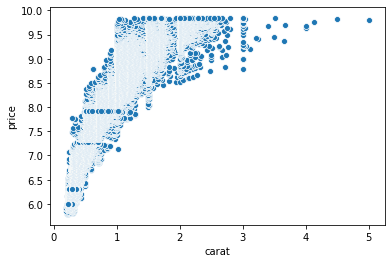

In [5]:
sns.scatterplot(X['carat'], y);

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state= 42)

In [7]:
df.corr()*100

,carat,depth,table,price,x,y,z
carat,100.000000,2.822431,18.161755,92.159130,97.509423,95.172220,95.338738
depth,2.822431,100.000000,-29.577852,-1.064740,-2.528925,-2.934067,9.492388
table,18.161755,-29.577852,100.000000,12.713390,19.534428,18.376015,15.092869
price,92.159130,-1.064740,12.713390,100.000000,88.443516,86.542090,86.124944
x,97.509423,-2.528925,19.534428,88.443516,100.000000,97.470148,97.077180
y,95.172220,-2.934067,18.376015,86.542090,97.470148,100.000000,95.200572
z,95.338738,9.492388,15.092869,86.124944,97.077180,95.200572,100.000000


In [8]:
# cut_lst = list(X_train.cut.unique())
# cut_dict = {typ : X_train.loc[X_train['cut'] == typ] for typ in cut_lst}    

In [9]:
# cut_dict['Premium'].head()

In [10]:
#set up the model comparison dataframe
evaluation = pd.DataFrame({'Model': [],
                           'Power': [],
                           'Features':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})




For the simple bad linear reg model we used carat as it had the highest pearson coeff

In [11]:
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

In [12]:
lr = linear_model.LinearRegression()

lr.fit(X_train['carat'].values.reshape(-1,1), y_train)


pred = lr.predict(X_test['carat'].values.reshape(-1,1))

rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test, pred)),'.3f'))
rtrsm = float(format(lr.score(X_train['carat'].values.reshape(-1,1), y_train),'.3f'))
rtesm = float(format(lr.score(X_test['carat'].values.reshape(-1,1), y_test),'.3f'))
crossvalidation = KFold(n_splits = 5, shuffle = True, random_state=1)
cv = float(format(cross_val_score(lr,X_train[['carat']],y_train,cv=crossvalidation).mean(),'.3f'))

print ("Average Price for Test Data: {:.2f}".format(y_test.mean()))
print('Intercept: {:.2f}'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))

r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression', 1,'carats', rmsesm, rtrsm,'-', rtesm,'-', cv]
evaluation

Average Price for Test Data: 7.78
Intercept: 6.22
Coefficient: [1.97181554]


,Model,Power,Features,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,1.0,carats,0.396,0.847,-,0.848,-,0.847


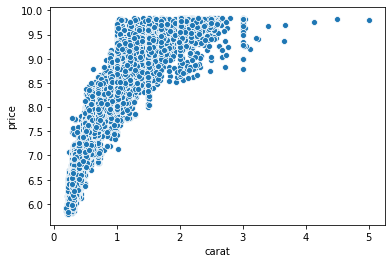

In [13]:
sns.scatterplot(x = X_train.carat, y = y_train)

In [14]:
lr = linear_model.LinearRegression()

lr.fit(X_train['table'].values.reshape(-1,1), y_train)


pred = lr.predict(X_test['table'].values.reshape(-1,1))

rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test, pred)),'.3f'))
rtrsm = float(format(lr.score(X_train['table'].values.reshape(-1,1), y_train),'.3f'))
rtesm = float(format(lr.score(X_test['table'].values.reshape(-1,1), y_test),'.3f'))
crossvalidation = KFold(n_splits = 5, shuffle = True, random_state=1)
cv = float(format(cross_val_score(lr,X_train[['table']],y_train,cv=crossvalidation).mean(),'.3f'))

print ("Average Price for Test Data: {:.2f}".format(y_test.mean()))
print('Intercept: {:.2f}'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))

r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression', 1,'table', rmsesm, rtrsm,'-', rtesm,'-', cv]
evaluation

Average Price for Test Data: 7.78
Intercept: 3.74
Coefficient: [0.07047209]


,Model,Power,Features,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,1.0,carats,0.396,0.847,-,0.848,-,0.847
1,Simple Linear Regression,1.0,table,1.001,0.024,-,0.029,-,0.024


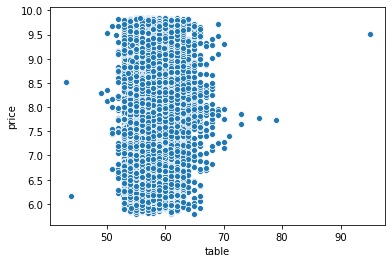

In [15]:
sns.scatterplot(x = X_train.table, y = y_train)

In [16]:
lr = linear_model.LinearRegression()

lr.fit(X_train['depth'].values.reshape(-1,1), y_train)


pred = lr.predict(X_test['depth'].values.reshape(-1,1))

rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test, pred)),'.3f'))
rtrsm = float(format(lr.score(X_train['depth'].values.reshape(-1,1), y_train),'.3f'))
rtesm = float(format(lr.score(X_test['depth'].values.reshape(-1,1), y_test),'.3f'))
crossvalidation = KFold(n_splits = 5, shuffle = True, random_state=1)
cv = float(format(cross_val_score(lr,X_train[['depth']],y_train,cv=crossvalidation).mean(),'.3f'))

print ("Average Price for Test Data: {:.2f}".format(y_test.mean()))
print('Intercept: {:.2f}'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))

r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression', 1,'depth', rmsesm, rtrsm,'-', rtesm,'-', cv]
evaluation

Average Price for Test Data: 7.78
Intercept: 7.59
Coefficient: [0.00319106]


,Model,Power,Features,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,1.0,carats,0.396,0.847,-,0.848,-,0.847
1,Simple Linear Regression,1.0,table,1.001,0.024,-,0.029,-,0.024
2,Simple Linear Regression,1.0,depth,1.016,0.000,-,-0.000,-,-0.000


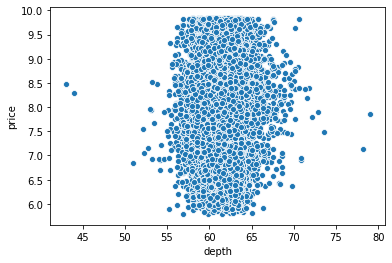

In [17]:
sns.scatterplot(x = X_train.depth, y = y_train)

In [18]:

complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(X_train, y_train)

coefficients = complex_model_1.coef_
coeff = dict(zip(con_features, coefficients))

pred = complex_model_1.predict(X_test)

rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test, pred)),'.3f'))

rtrcm = float(format(complex_model_1.score(X_train, y_train),'.3f'))
artrcm = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(con_features)),'.3f'))
rtesm = float(format(complex_model_1.score(X_test, y_test),'.3f'))
artecm = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(con_features)),'.3f'))

crossvalidation = KFold(n_splits = 5, shuffle = True, random_state=42)
cv = float(format(cross_val_score(complex_model_1, X_train, y_train, cv=crossvalidation).mean(),'.3f'))

print ("Average Price for Test Data: {:.2f}".format(y_test.mean()))
print('Intercept: {:.2f}'.format(complex_model_1.intercept_))
print('Coefficient: {}'.format(complex_model_1.coef_))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multivariate Linear Regression', 1, 'all', rmsesm, artrcm, rtrsm, rtesm, artecm, cv]
evaluation

Average Price for Test Data: 7.78
Intercept: 0.91
Coefficient: [-0.67730015  1.07860587  0.03886645  0.05496669  0.02276756 -0.01027261]


,Model,Power,Features,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,1.0,carats,0.396,0.847,-,0.848,-,0.847
1,Simple Linear Regression,1.0,table,1.001,0.024,-,0.029,-,0.024
2,Simple Linear Regression,1.0,depth,1.016,0.000,-,-0.000,-,-0.000
3,Multivariate Linear Regression,1.0,all,0.272,0.923,0,0.928,0.928,0.920


In [19]:
# def stand_norm(col, data, train):
#     mean = train[col].mean()
#     std = train[col].std()
#     stand = (data[col] - mean)/(std)
#     return stand

In [20]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform (X_test)

In [21]:
y_train, y_test = np.log(y_train), np.log(y_test)

In [22]:
complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(X_train, y_train)

coefficients = complex_model_1.coef_
coeff = dict(zip(con_features, coefficients))

pred = complex_model_1.predict(X_test)

rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test, pred)),'.3f'))
artrcm = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(con_features)),'.3f'))
rtrcm = float(format(complex_model_1.score(X_train, y_train),'.3f'))

rtesm = float(format(complex_model_1.score(X_test, y_test),'.3f'))
artecm = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(con_features)),'.3f'))
crossvalidation = KFold(n_splits = 5, shuffle = True, random_state=42)
cv = float(format(cross_val_score(complex_model_1, X_train, y_train, cv=crossvalidation).mean(),'.3f'))

print ("Average Price for Test Data: {:.2f}".format(y_test.mean()))
print('Intercept: {:.2f}'.format(complex_model_1.intercept_))
print('Coefficient: {}'.format(coeff))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multivariate Linear Regression', 1,'all (standardised)', rmsesm, rtrsm, artrcm, rtesm, artecm, cv]
evaluation

Average Price for Test Data: 2.04
Intercept: 2.04
Coefficient: {'carat': -0.0671820059359725, 'x': 0.179642918166586, 'y': 0.0060646437204026175, 'z': 0.0053216719094996085, 'depth': 0.005754390441683139, 'table': -0.0024560199431317184}


,Model,Power,Features,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,1.0,carats,0.396,0.847,-,0.848,-,0.847
1,Simple Linear Regression,1.0,table,1.001,0.024,-,0.029,-,0.024
2,Simple Linear Regression,1.0,depth,1.016,0.000,-,-0.000,-,-0.000
3,Multivariate Linear Regression,1.0,all,0.272,0.923,0,0.928,0.928,0.920
4,Multivariate Linear Regression,1.0,all (standardised),0.036,0.000,0.919,0.925,0.925,0.916


In [23]:
poly = PolynomialFeatures(2)
X_train_2 = poly.fit_transform(X_train)
X_test_2 = poly.transform(X_test)

In [24]:
poly_model_2 = linear_model.LinearRegression()
poly_model_2.fit(X_train_2, y_train)

coefficients = poly_model_2.coef_
coeff = dict(zip(con_features, coefficients))

pred = poly_model_2.predict(X_test_2)

rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test, pred)),'.3f'))

rtrcm = float(format(poly_model_2.score(X_train_2, y_train),'.3f'))
artrcm = float(format(adjustedR2(poly_model_2.score(X_train_2, y_train),X_train_2.shape[0],X_train_2.shape[1]),'.3f'))
rtesm = float(format(poly_model_2.score(X_test_2, y_test),'.3f'))
artecm = float(format(adjustedR2(poly_model_2.score(X_test_2, y_test),X_test_2.shape[0],X_test_2.shape[1]),'.3f'))
crossvalidation = KFold(n_splits = 5, shuffle = True, random_state=42)
cv = float(format(cross_val_score(poly_model_2, X_train_2, y_train, cv=crossvalidation).mean(),'.3f'))

print ("Average Price for Test Data: {:.2f}".format(y_test.mean()))
print('Intercept: {:.2f}'.format(poly_model_2.intercept_))
# print('Coefficient: {}'.format(coeff))
for coef in coefficients:
    if coef != 0:
        print(coef)

r = evaluation.shape[0]
evaluation.loc[r] = ['Multivariate Polynomial Regression', 2,'all (standardised)', rmsesm, rtrsm, artrcm, rtesm, artecm, cv]
evaluation

Average Price for Test Data: 2.04
Intercept: 2.07
2.709416203056431e-17
0.06467848844394945
0.05942256063318328
0.04293871662250766
-0.023754779075284956
3.350970637830482e-05
-0.003442317258253338
0.012444136404462429
-0.014168139213395926
0.02313401593404488
-0.05435605135839332
-0.0006449374379128627
0.00294466699365873
-0.03872397423937042
-0.0339703985313647
0.036406585995928734
-0.0038775022391298575
0.0013000211083476869
-0.007074287641090535
0.04850182430482654
0.0006173821452336072
-0.00550778585367557
0.0009536590243188557
0.000318482874225845
0.0009371931737018553
-0.0010019146790160522
0.0013390907211824619
5.7737390702145556e-05


,Model,Power,Features,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,1.0,carats,0.396,0.847,-,0.848,-,0.847
1,Simple Linear Regression,1.0,table,1.001,0.024,-,0.029,-,0.024
2,Simple Linear Regression,1.0,depth,1.016,0.000,-,-0.000,-,-0.000
3,Multivariate Linear Regression,1.0,all,0.272,0.923,0,0.928,0.928,0.920
4,Multivariate Linear Regression,1.0,all (standardised),0.036,0.000,0.919,0.925,0.925,0.916
5,Multivariate Polynomial Regression,2.0,all (standardised),0.032,0.000,0.939,0.941,0.941,0.227


In [25]:
poly = PolynomialFeatures(3)
X_train_3 = poly.fit_transform(X_train)
X_test_3 = poly.transform(X_test)

In [26]:
poly_model_3 = linear_model.LinearRegression()
poly_model_3.fit(X_train_3, y_train)

coefficients = poly_model_3.coef_
coeff = dict(zip(con_features, coefficients))

pred = poly_model_3.predict(X_test_3)

rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test, pred)),'.3f'))

rtrcm = float(format(poly_model_3.score(X_train_3, y_train),'.3f'))
artrcm = float(format(adjustedR2(poly_model_3.score(X_train_3, y_train),X_train_3.shape[0], X_train_3.shape[1]),'.3f'))
rtesm = float(format(poly_model_3.score(X_test_3, y_test),'.3f'))
artecm = float(format(adjustedR2(poly_model_3.score(X_test_3, y_test),X_test_3.shape[0],X_test_3.shape[1]),'.3f'))
crossvalidation = KFold(n_splits = 5, shuffle = True, random_state=42)
cv = float(format(cross_val_score(poly_model_3, X_train_3, y_train, cv=crossvalidation).mean(),'.3f'))

print ("Average Price for Test Data: {:.2f}".format(y_test.mean()))
print('Intercept: {:.2f}'.format(poly_model_3.intercept_))
# print('Coefficient: {}'.format(coeff))
for coef in coefficients:
    if coef != 0:
        print(coef)

r = evaluation.shape[0]
evaluation.loc[r] = ['Multivariate Polynomial Regression', 3,'all (standardised)', rmsesm, rtrsm, artrcm, rtesm, artecm, cv]
evaluation

Average Price for Test Data: 2.04
Intercept: 2.07
1.9489193491998431e-13
0.05867814992988778
0.0054187854657952806
0.06664197593600363
0.01234643318034532
0.0012860320466740985
-0.0005371488828442616
-0.0020442602119783515
0.2015527275659984
-0.09781278577488164
-0.14551615952361932
0.03124232604020575
0.016478455836808695
-0.31256862269901586
0.12574240357049316
0.12892693845768669
-0.031233876071365338
-0.019607390863543066
0.08531758988102783
-0.017282944605481
0.020894535615211134
0.02659142096823209
0.007885130356420017
-0.01493948012421214
-0.021425811046342468
-0.0010023666517992615
0.002651151280117515
-0.000895261893004852
-0.0017330996321253964
-0.09737941924344311
0.06854751759283284
0.03869587651304479
-0.008177838723412332
0.002273168833644523
-0.0365269835167041
-0.08416109906964477
0.19478681969514425
0.016809177560988944
-0.03269889398900942
0.1610078591915421
-0.25503183854335837
0.002150660028069412
0.03791361209879748
0.017050128300403734
-0.007229621261575613
-0.006

,Model,Power,Features,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,1.0,carats,0.396,0.847,-,0.848,-,0.847
1,Simple Linear Regression,1.0,table,1.001,0.024,-,0.029,-,0.024
2,Simple Linear Regression,1.0,depth,1.016,0.000,-,-0.000,-,-0.000
3,Multivariate Linear Regression,1.0,all,0.272,0.923,0,0.928,0.928,0.920
4,Multivariate Linear Regression,1.0,all (standardised),0.036,0.000,0.919,0.925,0.925,0.916
5,Multivariate Polynomial Regression,2.0,all (standardised),0.032,0.000,0.939,0.941,0.941,0.227
6,Multivariate Polynomial Regression,3.0,all (standardised),0.031,0.000,0.943,0.943,0.942,-245.825


In [27]:
lasso_1 = LassoCV(max_iter = 100000, cv = 5)
lasso_1.fit(X_train, y_train)

coefficients = lasso_1.coef_
coeff = dict(zip(con_features, coefficients))

pred = lasso_1.predict(X_test)

rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test, pred)),'.3f'))

rtrcm = float(format(lasso_1.score(X_train, y_train),'.3f'))
artrcm = float(format(adjustedR2(lasso_1.score(X_train, y_train), X_train.shape[0], X_train.shape[1]),'.3f'))
rtesm = float(format(lasso_1.score(X_test, y_test),'.3f'))
artecm = float(format(adjustedR2(lasso_1.score(X_test, y_test),X_test.shape[0],X_test.shape[1]),'.3f'))
crossvalidation = KFold(n_splits = 5, shuffle = True, random_state=42)
cv = float(format(cross_val_score(lasso_1, X_train, y_train, cv=crossvalidation).mean(),'.3f'))

print ("Average Price for Test Data: {:.2f}".format(y_test.mean()))
print('Intercept: {:.2f}'.format(lasso_1.intercept_))
print('Coefficient: {}'.format(coeff))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multivariate Lasso Regression', 1,'all (standardised) alpha = {}'.format(lasso_1.alpha_), rmsesm, rtrsm, artrcm, rtesm, artecm, cv]
evaluation

Average Price for Test Data: 2.04
Intercept: 2.04
Coefficient: {'carat': -0.06174598134028123, 'x': 0.17426555732172758, 'y': 0.005821087417699597, 'z': 0.005493509687584263, 'depth': 0.00533497945599071, 'table': -0.002369509760134942}


,Model,Power,Features,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,1.0,carats,0.396,0.847,-,0.848,-,0.847
1,Simple Linear Regression,1.0,table,1.001,0.024,-,0.029,-,0.024
2,Simple Linear Regression,1.0,depth,1.016,0.000,-,-0.000,-,-0.000
3,Multivariate Linear Regression,1.0,all,0.272,0.923,0,0.928,0.928,0.920
4,Multivariate Linear Regression,1.0,all (standardised),0.036,0.000,0.919,0.925,0.925,0.916
5,Multivariate Polynomial Regression,2.0,all (standardised),0.032,0.000,0.939,0.941,0.941,0.227
6,Multivariate Polynomial Regression,3.0,all (standardised),0.031,0.000,0.943,0.943,0.942,-245.825
7,Multivariate Lasso Regression,1.0,all (standardised) alpha = 0.00012456460656342709,0.036,0.000,0.919,0.925,0.925,0.913


In [28]:
lasso_2 = LassoCV(max_iter = 100000, cv = 5)
lasso_2.fit(X_train_2, y_train)

coefficients = lasso_2.coef_
coeff = dict(zip(con_features, coefficients))

pred = lasso_2.predict(X_test_2)

rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test, pred)),'.3f'))

rtrcm = float(format(lasso_2.score(X_train_2, y_train),'.3f'))
artrcm = float(format(adjustedR2(lasso_2.score(X_train_2, y_train), X_train_2.shape[0], X_train_2.shape[1]),'.3f'))
rtesm = float(format(lasso_2.score(X_test_2, y_test),'.3f'))
artecm = float(format(adjustedR2(lasso_2.score(X_test_2, y_test),X_test_2.shape[0],X_test_2.shape[1]),'.3f'))
crossvalidation = KFold(n_splits = 5, shuffle = True, random_state=42)
cv = float(format(cross_val_score(lasso_2, X_train_2, y_train, cv=crossvalidation).mean(),'.3f'))

print ("Average Price for Test Data: {:.2f}".format(y_test.mean()))
print('Intercept: {:.2f}'.format(lasso_2.intercept_))
# print('Coefficient: {}'.format(coeff))
for coef in coefficients:
    if coef != 0:
        print(coef)

r = evaluation.shape[0]
evaluation.loc[r] = ['Multivariate Lasso Regression', 2,'all (standardised) alpha = {}'.format(lasso_2.alpha_), rmsesm, rtrsm, artrcm, rtesm, artecm, cv]
evaluation

Average Price for Test Data: 2.04
Intercept: 2.08
0.08031857846977679
0.04722241859679471
0.015745241985281228
0.0011800057010701065
-0.0025411916135981956
-0.0032188443761477165
0.005676491761831684
-0.03533659614880803
-0.0003966576228132775
-0.00035377582893765796
-0.0010466918238824787
-0.001295655868330299
0.0014503286572960157


,Model,Power,Features,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,1.0,carats,0.396,0.847,-,0.848,-,0.847
1,Simple Linear Regression,1.0,table,1.001,0.024,-,0.029,-,0.024
2,Simple Linear Regression,1.0,depth,1.016,0.000,-,-0.000,-,-0.000
3,Multivariate Linear Regression,1.0,all,0.272,0.923,0,0.928,0.928,0.920
4,Multivariate Linear Regression,1.0,all (standardised),0.036,0.000,0.919,0.925,0.925,0.916
5,Multivariate Polynomial Regression,2.0,all (standardised),0.032,0.000,0.939,0.941,0.941,0.227
6,Multivariate Polynomial Regression,3.0,all (standardised),0.031,0.000,0.943,0.943,0.942,-245.825
7,Multivariate Lasso Regression,1.0,all (standardised) alpha = 0.00012456460656342709,0.036,0.000,0.919,0.925,0.925,0.913
8,Multivariate Lasso Regression,2.0,all (standardised) alpha = 0.00023341133005029923,0.032,0.000,0.938,0.939,0.939,0.937


In [29]:
itr = [x/1000 for x in list(range(0, 1000))]

In [30]:
ridge_1 = RidgeCV(alphas = (0.770, 0.771, 0.772, 0.773), cv = 5)
ridge_1.fit(X_train, y_train)

coefficients = ridge_1.coef_
coeff = dict(zip(con_features, coefficients))

pred = ridge_1.predict(X_test)

rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test, pred)),'.3f'))

rtrcm = float(format(ridge_1.score(X_train, y_train),'.3f'))
artrcm = float(format(adjustedR2(ridge_1.score(X_train, y_train), X_train.shape[0], X_train.shape[1]),'.3f'))
rtesm = float(format(ridge_1.score(X_test, y_test),'.3f'))
artecm = float(format(adjustedR2(ridge_1.score(X_test, y_test),X_test.shape[0],X_test.shape[1]),'.3f'))
crossvalidation = KFold(n_splits = 5, shuffle = True, random_state=42)
cv = float(format(cross_val_score(ridge_1, X_train, y_train, cv=crossvalidation).mean(),'.3f'))

print ("Average Price for Test Data: {:.2f}".format(y_test.mean()))
print('Intercept: {:.2f}'.format(ridge_1.intercept_))
print('Coefficient: {}'.format(coeff))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multivariate Ridge Regression', 1,'all (standardised) alpha = {}'.format(ridge_1.alpha_), rmsesm, rtrsm, artrcm, rtesm, artecm, cv]
evaluation

Average Price for Test Data: 2.04
Intercept: 2.04
Coefficient: {'carat': -0.06709128729648046, 'x': 0.17946301261101844, 'y': 0.006104675745147431, 'z': 0.005372517195282675, 'depth': 0.005743620963429573, 'table': -0.002455338888931608}


,Model,Power,Features,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,1.0,carats,0.396,0.847,-,0.848,-,0.847
1,Simple Linear Regression,1.0,table,1.001,0.024,-,0.029,-,0.024
2,Simple Linear Regression,1.0,depth,1.016,0.000,-,-0.000,-,-0.000
3,Multivariate Linear Regression,1.0,all,0.272,0.923,0,0.928,0.928,0.920
4,Multivariate Linear Regression,1.0,all (standardised),0.036,0.000,0.919,0.925,0.925,0.916
5,Multivariate Polynomial Regression,2.0,all (standardised),0.032,0.000,0.939,0.941,0.941,0.227
6,Multivariate Polynomial Regression,3.0,all (standardised),0.031,0.000,0.943,0.943,0.942,-245.825
7,Multivariate Lasso Regression,1.0,all (standardised) alpha = 0.00012456460656342709,0.036,0.000,0.919,0.925,0.925,0.913
8,Multivariate Lasso Regression,2.0,all (standardised) alpha = 0.00023341133005029923,0.032,0.000,0.938,0.939,0.939,0.937
9,Multivariate Ridge Regression,1.0,all (standardised) alpha = 0.77,0.036,0.000,0.919,0.925,0.925,0.916


Ridge works best with alpha =0.772 (for non-logged y)

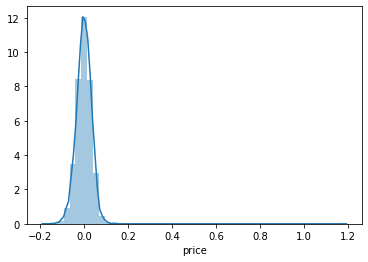

In [43]:
sns.distplot(y_test-pred)

In [44]:
normaltest(y_test-pred)

NormaltestResult(statistic=9388.968057881946, pvalue=0.0)

In [46]:
import numpy as np

In [52]:
test = np.random.normal(size = 100000000)

In [53]:
normaltest(test)

NormaltestResult(statistic=0.018637443558305235, pvalue=0.9907245629515128)

In [57]:
resid = y_test-pred

In [59]:
resid.max() - resid.min()

1.3520473671346573

In [60]:
testlst = []
for num in resid:
    if num < 0.25:
        testlst.append(num)

(<matplotlib.axes._subplots.AxesSubplot at 0x1a2677d9b0>,
 NormaltestResult(statistic=136.336880580021, pvalue=2.482118674773725e-30))

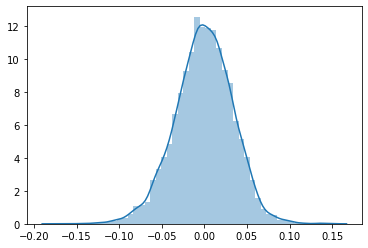

In [63]:
sns.distplot(testlst), normaltest(testlst)